<a href="https://colab.research.google.com/github/Azizi216/ML-project/blob/main/Car_price_prediction/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
# dataset
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [5]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
car_dataset.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [7]:
car_dataset.shape

(4340, 8)

In [8]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [10]:
car_dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4},
                     'seller_type':{'Individual':0,'Dealer':1, 'Trustmark Dealer':2},
                     'transmission':{'Manual':0, 'Automatic':1},
                     'owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4 }
                     }, inplace = True)

/tmp/ipython-input-214503813.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4},


In [11]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [12]:
X = car_dataset.drop(['name', 'selling_price'], axis=1)
Y = car_dataset['selling_price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
training_data_prediction = model.predict(X_train)

In [17]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.4430787587921934


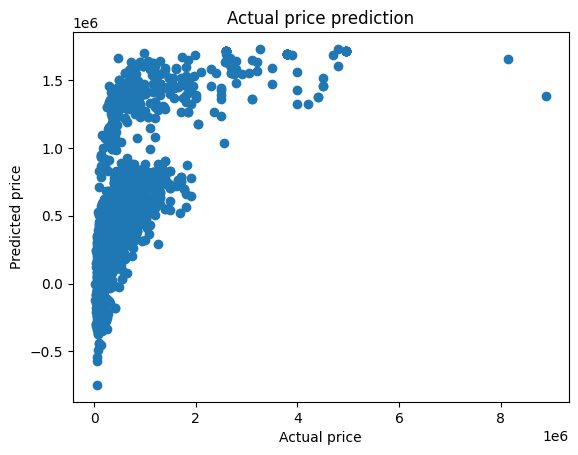

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price prediction")
plt.show()


In [20]:
test_data_prediction = model.predict(X_test)

In [21]:
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(test_error_score)

0.5212912933220211


lasso regerssion

In [22]:
model = Lasso()

In [23]:
model.fit(X_train, Y_train)

Lasso()

In [24]:
training_data_prediction = model.predict(X_train)

In [25]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.4430787587404139


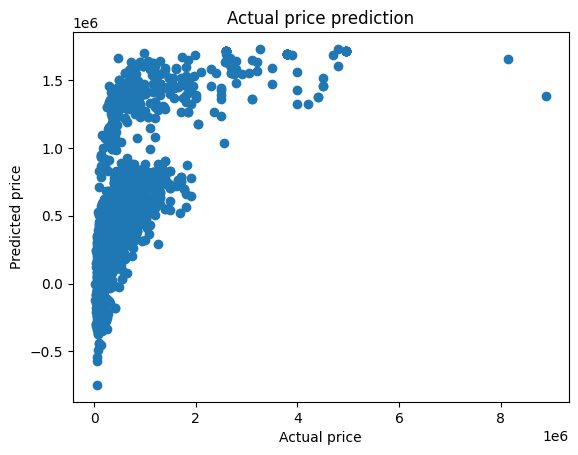

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price prediction")
plt.show()


In [27]:
test_data_prediction = model.predict(X_test)

In [28]:
test_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(test_error_score)

0.5212906062492373
